In [98]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.shape

(41188, 21)

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df['y_bool'] = np.where(df['y']=='yes', 1, 0)
df = df.drop(['y'], axis=1)

features = [col for col in df.columns if col != 'y_bool']
X_train, X_test, y_train, y_test = train_test_split(df[features], df['y_bool'], test_size=0.33, random_state=42)

In [101]:
pd.qcut(X_train['age'], q=5)

8505       (41.0, 49.0]
28321      (31.0, 35.0]
2582       (31.0, 35.0]
9407       (41.0, 49.0]
33934      (49.0, 98.0]
22715      (49.0, 98.0]
35648    (16.999, 31.0]
27159      (49.0, 98.0]
28154      (35.0, 41.0]
5222       (49.0, 98.0]
40555      (31.0, 35.0]
40894      (35.0, 41.0]
38466      (49.0, 98.0]
26542      (35.0, 41.0]
1558     (16.999, 31.0]
18618      (41.0, 49.0]
30014      (31.0, 35.0]
29719    (16.999, 31.0]
2898       (41.0, 49.0]
25432    (16.999, 31.0]
17943      (41.0, 49.0]
2018       (49.0, 98.0]
21460    (16.999, 31.0]
16172    (16.999, 31.0]
8902       (41.0, 49.0]
7042     (16.999, 31.0]
7627       (31.0, 35.0]
24588      (41.0, 49.0]
11890    (16.999, 31.0]
20438    (16.999, 31.0]
              ...      
1267       (35.0, 41.0]
1899       (31.0, 35.0]
35773      (35.0, 41.0]
19118      (35.0, 41.0]
189        (31.0, 35.0]
2747       (41.0, 49.0]
18431      (41.0, 49.0]
18942      (31.0, 35.0]
25658      (41.0, 49.0]
27480      (41.0, 49.0]
6396     (16.999

In [93]:
X_train_personal = X_train[['job', 'marital', 'education', 'default', 'housing', 'loan']].copy()
X_train_personal['age'] = pd.cut(X_train['age'],bins=(0, 30, 35, 40, 45, 50, 100))

In [96]:
enc = OneHotEncoder(handle_unknown='ignore')
X_train_personal_encode = enc.fit_transform(X_train_personal)
enc.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array([Interval(0, 30, closed='right'), Interval(30, 35, closed='right'),
        Interval(35, 40, closed='right'), Interval(40, 45, closed='right'),
        Interval(45, 50, closed='right'),
        Interval(50, 100, closed='right')], dtype=object)]

In [104]:
pd.qcut(X_train['duration']/60, q=5)

8505     (-0.001, 1.483]
28321      (6.1, 81.967]
2582        (3.683, 6.1]
9407      (2.433, 3.683]
33934    (-0.001, 1.483]
22715     (1.483, 2.433]
35648     (2.433, 3.683]
27159    (-0.001, 1.483]
28154      (6.1, 81.967]
5222       (6.1, 81.967]
40555     (2.433, 3.683]
40894       (3.683, 6.1]
38466    (-0.001, 1.483]
26542      (6.1, 81.967]
1558      (1.483, 2.433]
18618      (6.1, 81.967]
30014     (2.433, 3.683]
29719       (3.683, 6.1]
2898     (-0.001, 1.483]
25432    (-0.001, 1.483]
17943       (3.683, 6.1]
2018       (6.1, 81.967]
21460       (3.683, 6.1]
16172    (-0.001, 1.483]
8902        (3.683, 6.1]
7042       (6.1, 81.967]
7627        (3.683, 6.1]
24588       (3.683, 6.1]
11890    (-0.001, 1.483]
20438      (6.1, 81.967]
              ...       
1267     (-0.001, 1.483]
1899      (2.433, 3.683]
35773    (-0.001, 1.483]
19118       (3.683, 6.1]
189       (1.483, 2.433]
2747        (3.683, 6.1]
18431    (-0.001, 1.483]
18942     (2.433, 3.683]
25658    (-0.001, 1.483]


In [106]:
X_train_contact=pd.DataFrame()
X_train_contact['duration'] = pd.cut(X_train['duration']/60,bins=(-1, 1.5, 2.5, 3.5, 6, 100))

In [ ]:
X_train_encode=pd.DataFrame()
for column_name in X_train.columns:
    if X_train[column_name].dtype == object:
        le = preprocessing.LabelEncoder()
        X_train_encode[column_name] = le.fit_transform(X_train[column_name])
    else:
        X_train_encode[column_name] = X_train[column_name]

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train_encode, y_train)

In [528]:
X_test_encode=pd.DataFrame()
for column_name in X_test.columns:
    if X_test[column_name].dtype == object:
        le = preprocessing.LabelEncoder()
        X_test_encode[column_name] = le.fit_transform(X_test[column_name])
    else:
        X_test_encode[column_name] = X_test[column_name]

In [529]:
1-abs(clf.predict(X_test_encode) - y_test).sum()/len(y_test)

0.9076730670197896

In [530]:
fe = pd.DataFrame({
    'Feature': X_train.columns,
    'Feature Importance': clf.feature_importances_ 
})

In [531]:
fe.sort_values(['Feature Importance'], ascending=False)

,Feature,Feature Importance
10,duration,0.312532
18,euribor3m,0.098260
0,age,0.093765
19,nr.employed,0.063884
12,pdays,0.046668
1,job,0.045205
3,education,0.042566
11,campaign,0.041671
9,day_of_week,0.039632
15,emp.var.rate,0.035290


In [532]:
X_bin = X_train.copy()

In [696]:
X_bin['age_bin'] = pd.cut(X_bin['age'],bins=(0, 30, 35, 40, 45, 50,55, 60, 90))
X_bin['duration_bin'] = pd.cut((X_bin['duration']/60), bins=np.concatenate((np.arange(0,5,0.25),
                                                                            np.arange(5,7,0.5),
                                                                           np.array([7,8,9,10,12,100])), axis=None))
X_bin['campaign_bin'] = np.where(X_bin['campaign']>10, '10+', X_bin['campaign'].astype('str'))
X_bin['cpi_bin'] = pd.cut(X_bin['cons.price.idx'], bins=np.arange(92, 95, 0.5))
X_bin['euribor3m_bin'] = pd.cut(X_bin['euribor3m'], bins=(0, 0.5, 1, 1.5, 4, 4.5, 4.7, 4.8, 4.9, 5, 5.5))

In [697]:
df_bin = pd.concat([X_bin[['age_bin', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                  'contact', 'month', 'day_of_week', 'duration_bin', 'campaign_bin', 'pdays',
                  'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                  'cpi_bin', 'euribor3m_bin', 'nr.employed']],
                    y_train], axis=1)

In [698]:
df_bin.head()

,age_bin,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign_bin,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cpi_bin,euribor3m_bin,nr.employed,y_bool
8505,"(40, 45]",blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,...,4,999,0,nonexistent,1.4,94.465,"(94.0, 94.5]","(4.8, 4.9]",5228.1,0
28321,"(30, 35]",admin.,married,high.school,no,yes,no,cellular,apr,wed,...,1,999,0,nonexistent,-1.8,93.075,"(93.0, 93.5]","(1.0, 1.5]",5099.1,1
2582,"(30, 35]",management,married,university.degree,no,yes,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,"(93.5, 94.0]","(4.8, 4.9]",5191.0,0
9407,"(45, 50]",blue-collar,married,basic.4y,unknown,no,no,telephone,jun,fri,...,4,999,0,nonexistent,1.4,94.465,"(94.0, 94.5]","(4.9, 5.0]",5228.1,0
33934,"(50, 55]",admin.,married,basic.9y,no,yes,no,cellular,may,wed,...,2,999,1,failure,-1.8,92.893,"(92.5, 93.0]","(1.0, 1.5]",5099.1,0


In [699]:
respond_dict={}
for col in [col for col in df_bin.columns if col not in ['y_bool']]:
    respond = df_bin.groupby([col]).mean().y_bool.rename('respond_rate').reset_index()
    cnt = df_bin.groupby([col]).count().y_bool.rename('count').reset_index()
    respond_df = respond.merge(cnt, on=col)
    
    if col=='pdays':
        respond_df = respond_df[respond_df[col]!=999]
                
    respond_dict[col] = respond_df
    
def plot_bar(col, respond_dict=respond_dict):
    
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    l1 = ax1.scatter(
        x=respond_dict.get(col)[col].astype('str'),
        y=respond_dict.get(col)['respond_rate'],
        color='tab:orange',
        zorder=2
    )
    l3 = ax1.plot(
        respond_dict.get(col)['respond_rate'],
        color='tab:orange',
    )
    
    ax1.set_xticklabels(respond_dict.get(col)[col].astype('str'), rotation=-90)
    ax1.set_title(f'{col} histgram with respond rate')

    
    ax2 = ax1.twinx() 
    
    l2 = ax2.bar(
        respond_dict.get(col)[col].astype('str'),
        respond_dict.get(col)['count'],
        color='lightgrey', 
        alpha=0.3,
        zorder=1
    )

    plt.legend(
        handles=[l1, l2],
        labels = ['respond rate','population'],
        loc='upper left', 
        bbox_to_anchor=[1.1,1])
    
    plt.close()
    
    return fig
    

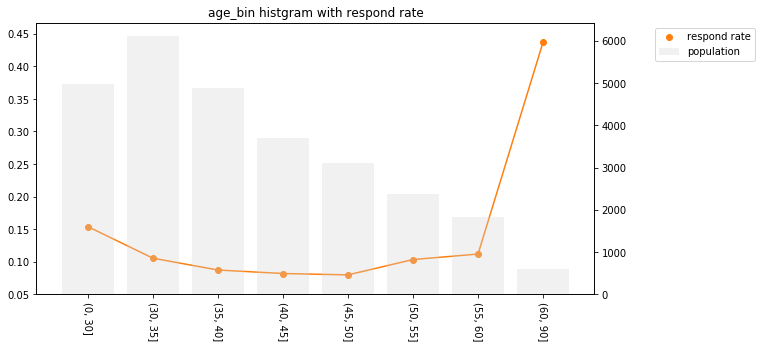

In [681]:
fig = plot_bar('age_bin')
fig

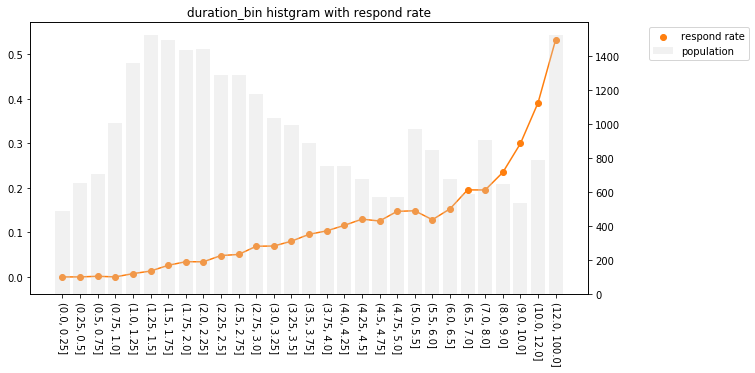

In [682]:
fig = plot_bar('duration_bin')
fig

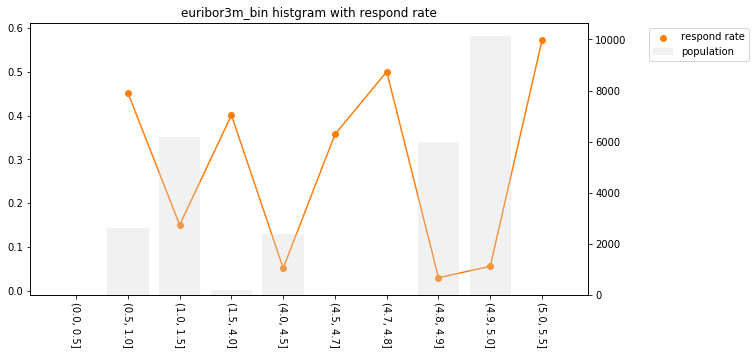

In [700]:
fig = plot_bar('euribor3m_bin')
fig

In [ ]:
for col in [col for col in df_bin.columns if col not in ['y_bool']]:
    plot_bar(col)    

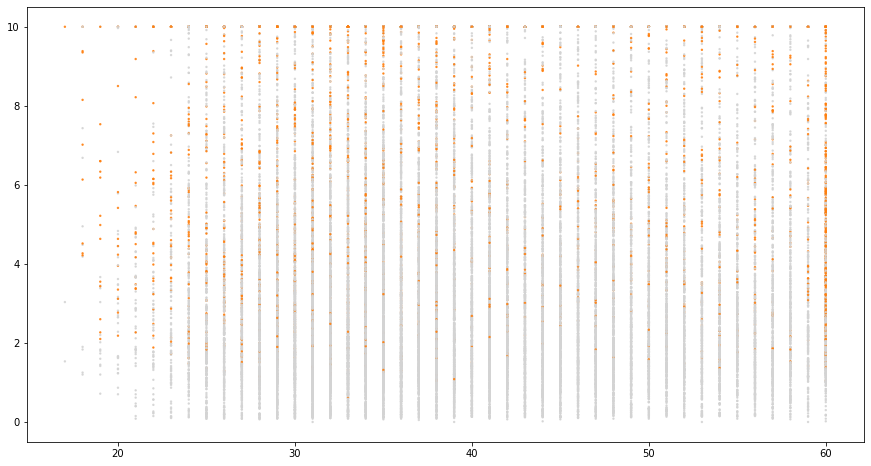

In [392]:
plt.figure(figsize=(15,8))
plt.scatter(
    x=np.where(X_train['age']>60, 60, X_train['age']),
    y=np.where(X_train['duration']/60>10,10,X_train['duration']/60),
    c=np.where(y_train==1, 'tab:orange', 'lightgrey'),
    alpha=0.8,
    s=2
)